In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
#DATA IMPORT

#Reading the file from csv into pandas Dataframe
df = pd.read_csv('cleaned_data/police_killings_to_present.csv', encoding="latin1")
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,state names
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,Washington
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,Oregon
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,Kansas
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,California
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,Colorado


In [3]:
df.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'state names'],
      dtype='object')

In [4]:
df_new = df.loc[:,["race", "date", "city", "state", "state names", "armed"]]
df_new.head()

,race,date,city,state,state names,armed
0,A,2015-01-02,Shelton,WA,Washington,gun
1,W,2015-01-02,Aloha,OR,Oregon,gun
2,H,2015-01-03,Wichita,KS,Kansas,unarmed
3,W,2015-01-04,San Francisco,CA,California,toy weapon
4,H,2015-01-04,Evans,CO,Colorado,nail gun


In [5]:
#DATA IMPORT

#Reading the file from csv into pandas Dataframe
df2 = pd.read_csv('cleaned_data/police_killings_to_present.csv', encoding="latin1")
df2.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,state names
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,Washington
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,Oregon
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,Kansas
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,California
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,Colorado


In [6]:
df2.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'state names'],
      dtype='object')

In [7]:
df2_new = df2.loc[:,["race", "date", "city", "state", "state names", "armed"]]
unique_armed = df2_new['armed'].unique().copy()


In [8]:
df2_new['race'].replace({'H':'Hispanic','A':'Asian', 'W':'White','B':'Black'}, inplace=True)
df2_new = df2_new.rename(columns={'state names':'state_names'})

In [9]:
df2_new['date'] = pd.to_datetime(df2_new['date'])
df2_new['year'] = df2_new['date'].dt.year
df2_new.head()

,race,date,city,state,state_names,armed,year
0,Asian,2015-01-02,Shelton,WA,Washington,gun,2015
1,White,2015-01-02,Aloha,OR,Oregon,gun,2015
2,Hispanic,2015-01-03,Wichita,KS,Kansas,unarmed,2015
3,White,2015-01-04,San Francisco,CA,California,toy weapon,2015
4,Hispanic,2015-01-04,Evans,CO,Colorado,nail gun,2015


In [10]:
df2_new['race'].value_counts()

White       1041
Black        542
Hispanic     367
Asian         33
N             28
O             28
Name: race, dtype: int64

In [11]:
from sqlalchemy import create_engine
from sqlalchemy.ext.declarative import declarative_base

engine = create_engine('sqlite:///killings_db.sqlite')
conn = engine.connect()

df2_new.to_sql(name='police_killings_2015_to_present', con=engine, if_exists='replace', index=True)

(-1.1045548861403305,
 1.1100069176978802,
 -1.107018686544656,
 1.1003342231687931)

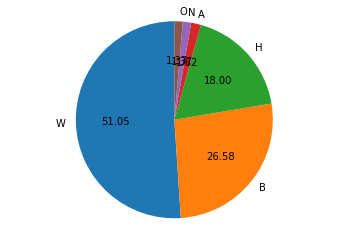

In [12]:
# import the pyplot library
import matplotlib.pyplot as plotter

# The slice race distribution pie chart
pieLabels = 'W', 'B', 'H', 'A', 'N', 'O'

# Race Data
raceData = [1041, 542, 367, 33, 28, 28]

figureObject, axesObject = plotter.subplots()

# Draw the pie chart
axesObject.pie(raceData,
        labels=pieLabels,
        autopct='%1.2f',
        startangle=90)

# Aspect ratio - equal means pie is a circle
axesObject.axis('equal')


In [13]:
df2_new['armed'].value_counts()

gun                    1173
knife                   319
unarmed                 155
vehicle                 136
undetermined            101
                       ... 
contractor's level        1
bayonet                   1
flashlight                1
machete and gun           1
straight edge razor       1
Name: armed, Length: 64, dtype: int64

(-1.1129991633867489,
 1.1141297987275323,
 -1.1124012863772557,
 1.100590537446536)

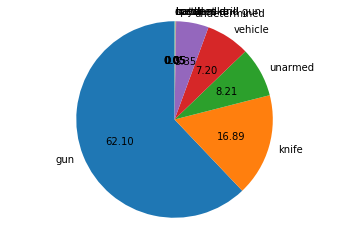

In [14]:
# import the pyplot library
import matplotlib.pyplot as plotter

# The slice race distribution pie chart
pieLabels = 'gun', 'knife', 'unarmed', 'vehicle', 'undetermined', 'hatched and gun', 'spear', 'cordless drill', 'bayonet', 'metal rake'

# Armed Data
armedData = [1173, 319, 155, 136, 101, 1, 1, 1, 1, 1]

figureObject, axesObject = plotter.subplots()

# Draw the pie chart
axesObject.pie(armedData,
        labels=pieLabels,
        autopct='%1.2f',
        startangle=90)

# Aspect ratio - equal means pie is a circle
axesObject.axis('equal')